<a href="https://colab.research.google.com/github/Shahid3384/CODTECH-Task1/blob/main/Data_analytics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective**
The objective of this project is to analyze five years of historical sales data to uncover key patterns and insights related to revenue, profit margins, customer behavior, and regional performance. By applying data cleaning, feature engineering, and Exploratory Data Analysis (EDA) techniques with tools like Power BI, the project aims to identify sales trends, seasonality, top-performing products, and channel contributions, thereby helping businesses optimize strategies and improve decision-making


In [11]:
#importing libarariec
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx',sheet_name = None)

In [13]:
 #Assign dataframes to each sheet(diff diff sheet store in diff diff data fram)

 df_sales   = sheets['Sales Orders']
 df_customer = sheets['Customers']
 df_products = sheets['Products']
 df_regions = sheets['Regions']
 df_state_reg = sheets['State Regions']
 df_budgets = sheets['2017 Budgets']

In [14]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [15]:
df_sales.shape

(64104, 12)

In [16]:
print ("df_sales shape:", (df_sales.shape) )

df_sales shape: (64104, 12)


In [17]:
# QUICK SHAPE OVERVIEW(give the dataframe shape rows*column)
print("df_sales shape:", (df_sales.shape))
print("df_customers shape:", (df_sales.shape))
print("df_products shape:",(df_products.shape))
print("df_regions shape: ",(df_regions.shape))
print("df_state_reg shape:", (df_state_reg.shape))
print("df_budgets  shape:",(df_budgets.shape))

df_sales shape: (64104, 12)
df_customers shape: (64104, 12)
df_products shape: (30, 2)
df_regions shape:  (994, 15)
df_state_reg shape: (49, 3)
df_budgets  shape: (30, 2)


In [18]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [19]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [20]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [21]:
# Get the header row
new_header = df_state_reg.iloc[0].values.tolist()

# Drop the header row from the dataframe
df_state_reg = df_state_reg[1:].copy()

# Set the new column names
df_state_reg.columns = new_header
df_state_reg.columns.name = None # Remove the name of the columns index

df_state_reg = df_state_reg.reset_index(drop=True)

print("Columns of df_state_reg after processing:", df_state_reg.columns)
df_state_reg.head(5)

Columns of df_state_reg after processing: Index(['State Code', 'State', 'Region'], dtype='object')


,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [22]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [23]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [24]:
#null value check

df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [25]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [26]:
df_state_reg.isnull().sum()

,0
State Code,0
State,0
Region,0


In [27]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


Data cleaning and Wrangling


In [28]:
#merge with customer
df = df_sales.merge(

    df_customer,
    how = 'left',
    left_on = 'Customer Name Index',
    right_on = 'Customer Index'
)

In [29]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [30]:
#merge with Product
df = df.merge(

    df_products,
    how = 'left',
    left_on = 'Product Description Index',
    right_on = 'Index'
)

In [31]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [32]:
# Merge with Regions
df = df.merge(
    df_regions,
    how = 'left',
    left_on = 'Delivery Region Index',
    right_on = 'id'
)

In [33]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [34]:
# 4.4 Merge with State Regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)


In [35]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [36]:
df.to_csv('file.csv')

In [37]:
# merge with Budgets
df = df.merge(
    df_budgets,
    how = 'left',
    on= 'Product Name'
)
print("Columns after merging with Budgets:", df.columns) # Add print

Columns after merging with Budgets: Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state',
       'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'State Code', 'Region', '2017 Budgets'],
      dtype='object')


In [38]:
#Customer Index
#Index
#Id
#State code
#Clean up redundant columns
cols_to_drop = ['Customer Index','Index', 'id', 'State Code']
df = df.drop(columns = cols_to_drop, errors= 'ignore')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [39]:
# Convert all columns to lower case for consistency and easier access
df.columns = df.columns.str.lower()

# Keep the important columns and delete the columns that we don't need
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]

# Use reindex to select columns, which might handle potential index inconsistencies
df = df.reindex(columns=cols_to_keep)

print("Final dataframe columns:", df.columns)

Final dataframe columns: Index(['ordernumber', 'orderdate', 'customer names', 'channel', 'product name',
       'order quantity', 'unit price', 'line total', 'total unit cost',
       'state_code', 'county', 'state', 'region', 'latitude', 'longitude',
       '2017 budgets'],
      dtype='object')


In [40]:
# Subset the DataFrame to only these columns
df = df[cols_to_keep]

In [41]:
# Rename to more Pythonic / self-explanatory names, including region
df = df.rename(columns={
    'ordernumber'      : 'order_number',
    'orderdate'        : 'order_date',
    'customer names'   : 'customer_name',
    'product name'     : 'product_name',
    'order quantity'   : 'quantity',
    'unit price'       : 'unit_price',
    'line total'       : 'revenue',
    'total unit cost'  : 'cost',
    'state_code'       : 'state',
    'state'            : 'state_name',
    'region'           : 'us_region',
    'latitude'         : 'lat',
    'longitude'        : 'lon',
    '2017 budgets'     : 'budget'
})

In [42]:
# Display the cleaned DataFrame structure
df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,county,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [43]:
# line total is revenue
# Budget record is empty except 2017
df.to_csv('final.csv')

In [44]:
# Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

# Inspect
df[['order_date','product_name','revenue','budget']].head(10)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN
5,2014-01-01,Product 23,57412.3,NaN
6,2014-01-01,Product 1,20120.1,NaN
7,2014-01-01,Product 25,10452.0,NaN
8,2014-01-01,Product 13,19262.5,NaN
9,2014-01-01,Product 14,34974.0,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   64104 non-null  object        
 1   order_date     64104 non-null  datetime64[ns]
 2   customer_name  64104 non-null  object        
 3   channel        64104 non-null  object        
 4   product_name   64104 non-null  object        
 5   quantity       64104 non-null  int64         
 6   unit_price     64104 non-null  float64       
 7   revenue        64104 non-null  float64       
 8   cost           64104 non-null  float64       
 9   state          64104 non-null  object        
 10  county         64104 non-null  object        
 11  state_name     64104 non-null  object        
 12  us_region      64104 non-null  object        
 13  lat            64104 non-null  float64       
 14  lon            64104 non-null  float64       
 15  budget         1526

In [46]:
# Check for missing values in each column of the dataset
df.isnull().sum()

,0
order_number,0
order_date,0
customer_name,0
channel,0
product_name,0
quantity,0
unit_price,0
revenue,0
cost,0
state,0


**feature engeenering **

In [47]:
df.head(5)

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,county,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN


In [48]:
# 1. Calculate total cost for each line item
df['total_cost'] = df['quantity'] * df['cost']

# 2. Calculate profit as revenue minus total_cost
df['profit'] = df['revenue'] - df['total_cost']

# 3. Calculate profit margin as a percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# 4. Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name'] = df['order_date'].dt.month_name()

# 5. Extract month number from order_date for correct sorting (1–12)
df['order_month_num'] = df['order_date'].dt.month

# 6. (Optional) Display the updated DataFrame
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,...,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,...,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,...,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,...,Florida,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,...,New York,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2


In [49]:
df.head(5)

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,...,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1


# EDA




```
# Monthaly sales strangth over a time

```



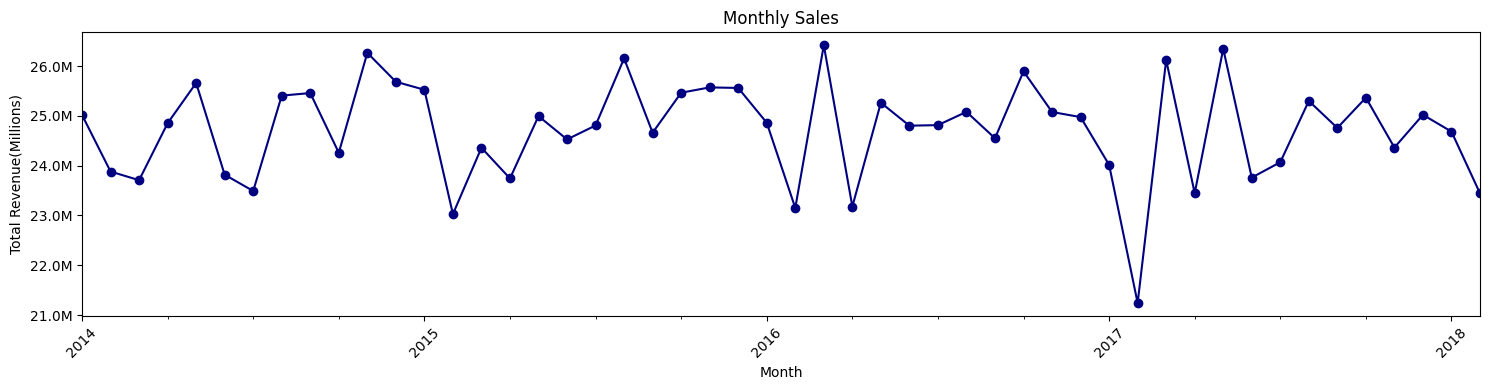

In [50]:

# It is also related to time series analysis

df['order_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15, 4))

monthly_sales.plot(marker= 'o', color='navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Revenue(Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

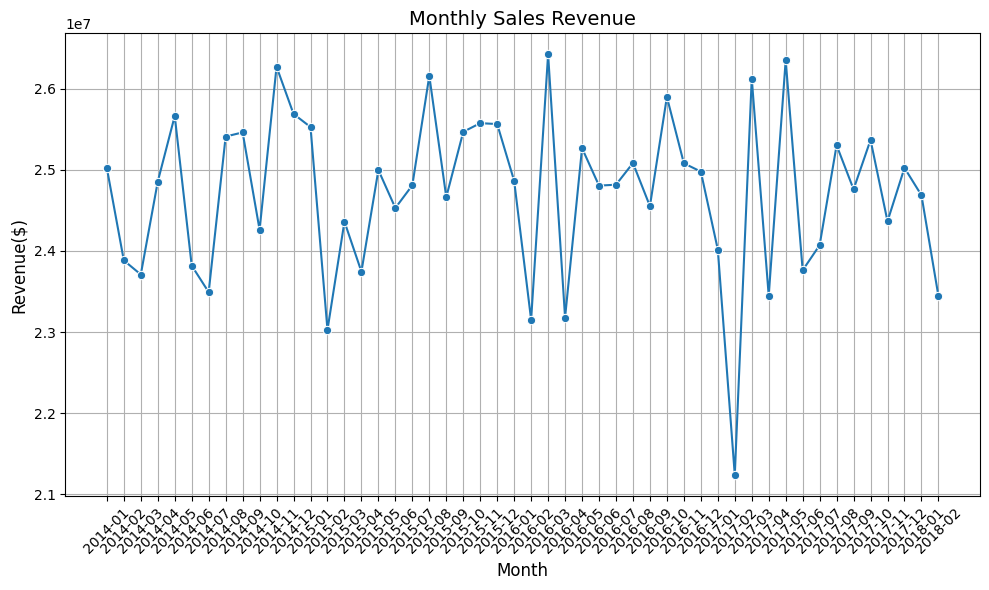

In [51]:
# Monthly sales line char

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Assuming df is your DataFrame
#Convert order_data to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

#Extrat year and month for grouping
df['year_month'] = df['order_date'].dt.to_period('M')

#Aggregate revenue by year_month
monthly_sales = df.groupby('year_month')['revenue'].sum().reset_index()

# Convert year_month back to string for plotting
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data = monthly_sales, x='year_month', y='revenue', marker= 'o')
plt.title('Monthly Sales Revenue', fontsize= 14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
# Assuming df is your DataFrame
# Convert order_date to datetime (if not already)
df['order_date'] = pd.to_datetime(df['order_date'])
# Remove records from January and February 2018
df_new = df [~((df['order_date'].dt.year == 2018) & (df['order_date'].dt.month.isin([1, 2])))]

/tmp/ipython-input-1747961884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'])
/tmp/ipython-input-1747961884.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new['order_date'].dt.strftime('%B')


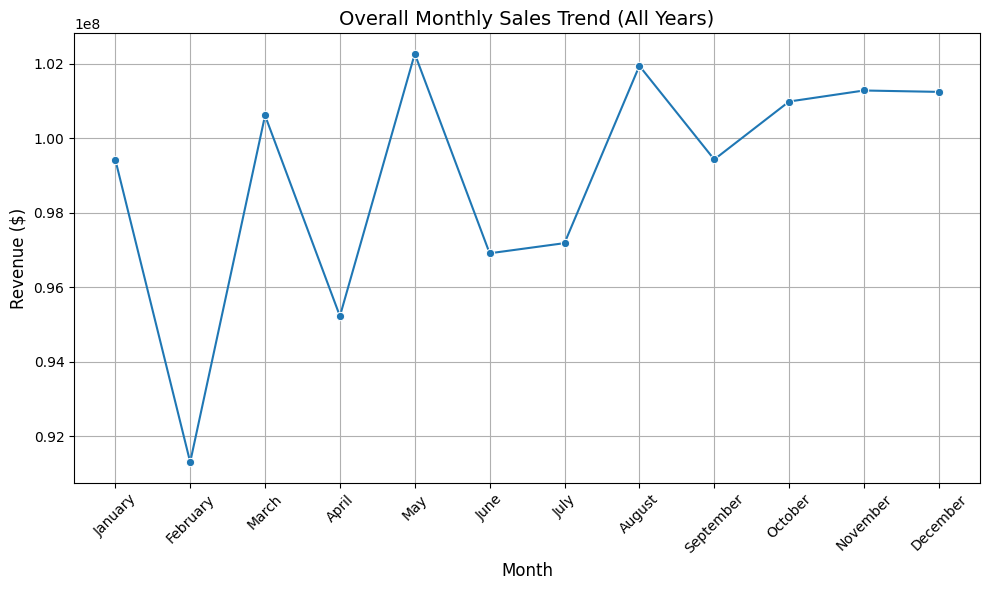

In [53]:
#Assuming df is your DataFrame
# Convert order_date to datetime
df_new['order_date'] = pd.to_datetime(df_new['order_date'])

# Extract month name for grouping
df_new['month'] = df_new['order_date'].dt.strftime('%B')

# Aggregate revenue by month across all years
monthly_trend = df_new.groupby('month') ['revenue'].sum().reset_index()

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month'] = pd.Categorical (monthly_trend['month'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values('month')

#Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trend, x='month', y='revenue', marker='o')
plt.title('Overall Monthly Sales Trend (All Years)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipython-input-2275915278.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=bottom_10_products, x='product_name', y='revenue', palette='tab10')


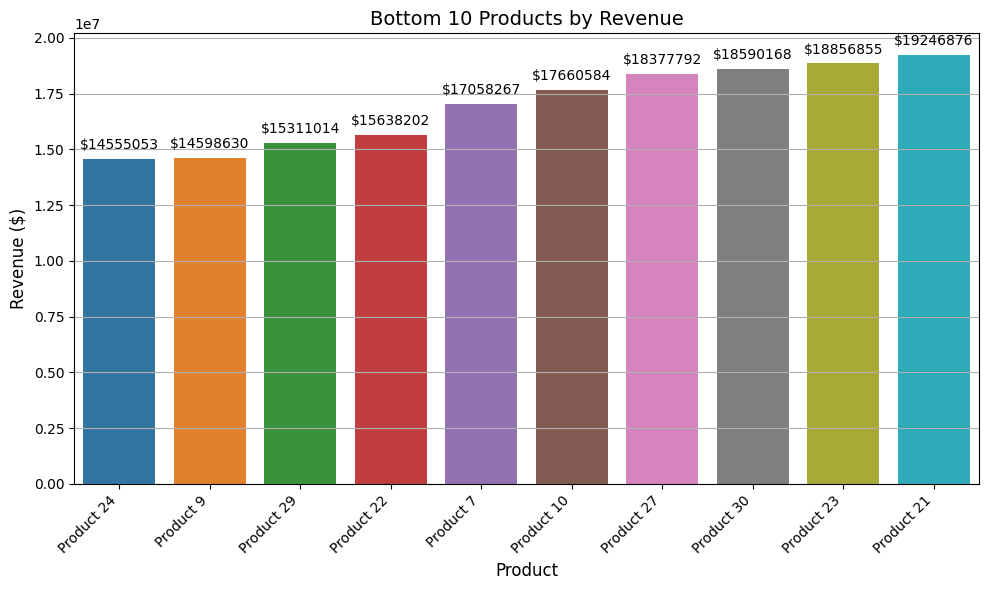

In [54]:
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Get bottom 10 products by revenue
bottom_10_products = product_revenue.sort_values(by='revenue', ascending=True).head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=bottom_10_products, x='product_name', y='revenue', palette='tab10')

# Add labels on top of each bar
for p in barplot.patches:
    barplot.annotate(f'${p.get_height():.0f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=10, color='black',
                      xytext=(0, 5), textcoords='offset points')

plt.title('Bottom 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()

# Show the plot
plt.show()

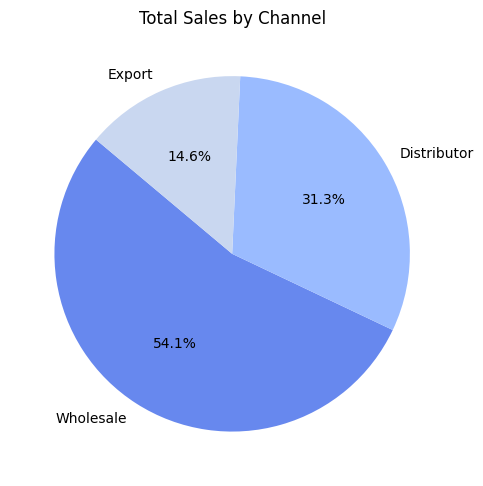

In [55]:
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

# Set figure size for the pie chart
plt.figure(figsize=(5, 5))

# Plot pie chart with percentage labels and a defined start angle
plt.pie(
    chan_sales.values,                   # Data: revenue values per channel
    labels=chan_sales.index,             # Labels: channel names
    autopct='%1.1f%%',                   # Display percentages with one decimal
    startangle=140,                      # Rotate chart so first slice starts at 140 degrees
    colors=sns.color_palette('coolwarm') # Color palette for slices
)

# Add title for context
plt.title('Total Sales by Channel')

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the chart
plt.show()

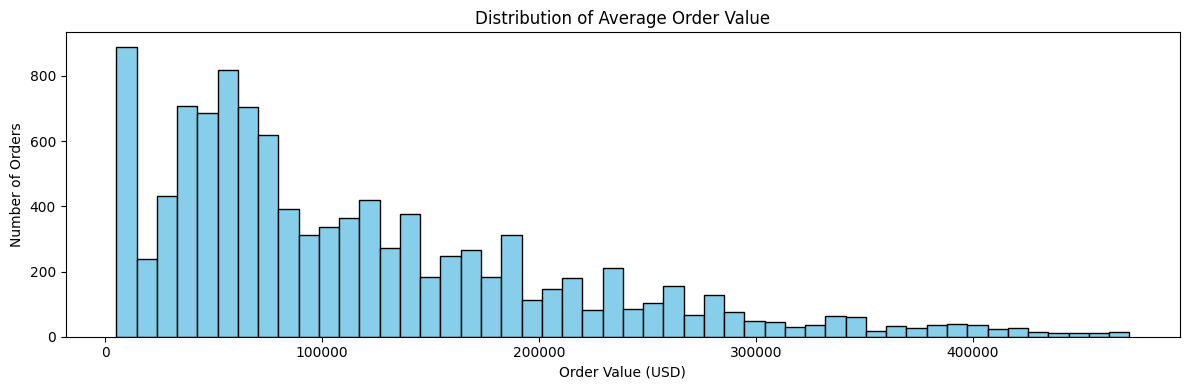

In [56]:
## Average order_value (AOV) Distribution

# Calculate the total revenue for each order to get the order value
aov = df.groupby('order_number')['revenue'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(12, 4))

# Plot a histogram of order values
plt.hist(
    aov,               # Data: list of order values
    bins=50,           # Number of bins to group order values
    color='skyblue',   # Fill color of the bars
    edgecolor='black'  # Outline color of the bars
)

# Add title and axis labels for context
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

In [57]:
# Unit Price Distribution per Product
# Top 10 State by Revenue and Order Count
# Average Profit Marging by Channel
# Top ten Bottom 10 Customer by Revenue
# Customer Segmentation : revenue vs Profit Margin

In [58]:
df.head(5)

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,...,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num,order_month,year_month
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1,2014-01,2014-01
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1,2014-01,2014-01
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1,2014-01,2014-01
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1,2014-01,2014-01
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1,2014-01,2014-01


/tmp/ipython-input-3637569076.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10, x='product_name', y='unit_price', palette='tab10')


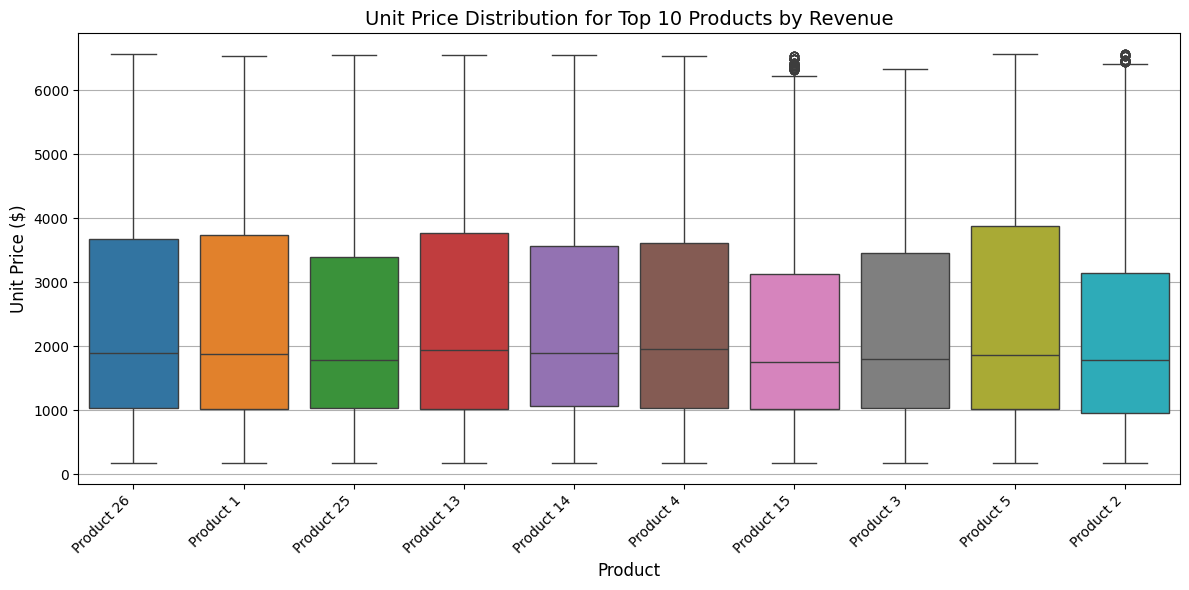

In [59]:
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)['product_name'].tolist()

# Filter df to include only top 10 products
df_top_10 = df[df['product_name'].isin(top_10_products)]

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_10, x='product_name', y='unit_price', palette='tab10')
plt.title('Unit Price Distribution for Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Unit Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()

# Show the plot
plt.show()

# Top 10 State by Revenue and Order Count


/tmp/ipython-input-2941591028.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot1 = sns.barplot(data=top_10_revenue, x='state_name', y='revenue', palette='tab10', ax=ax1)
/tmp/ipython-input-2941591028.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot2 = sns.barplot(data=top_10_orders, x='state_name', y= 'order_count', palette='tab10', ax=ax2)


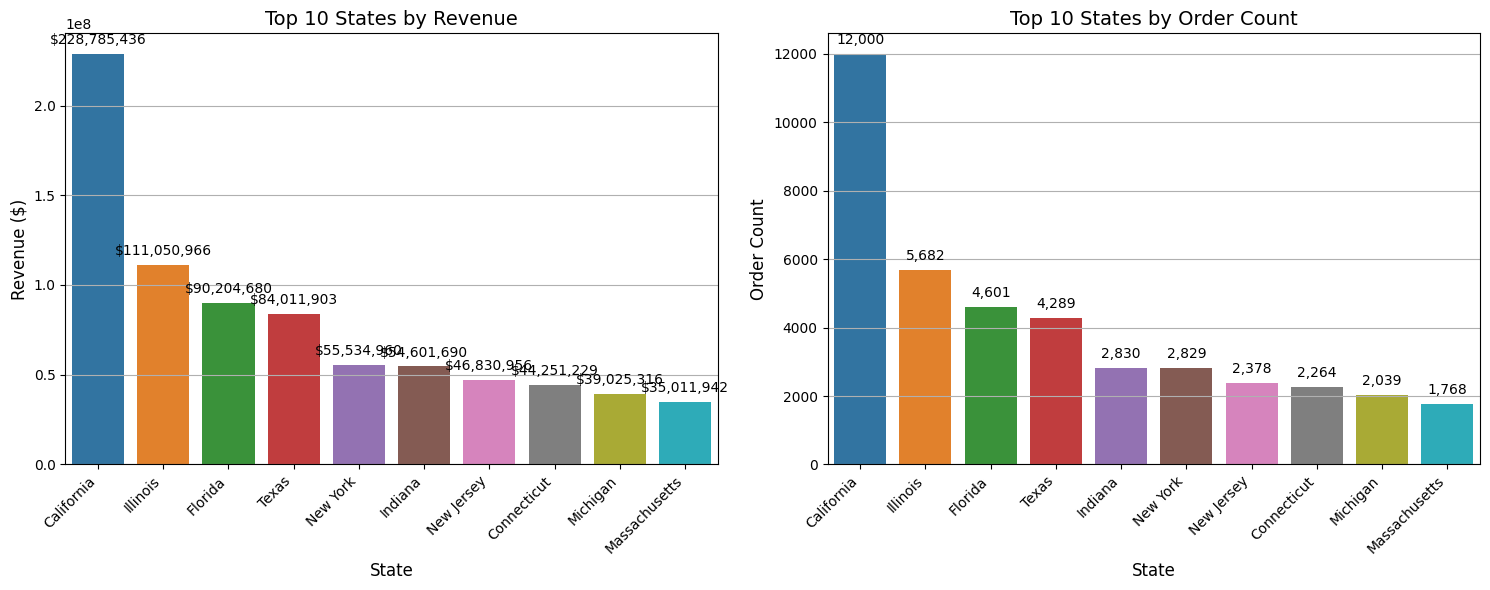

In [60]:
# Assuming df is your DataFrame
# Aggregate revenue and order count by state_name
state_stats = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),
    order_count=('order_number', 'count')
).reset_index()

# Get top 10 states by revenue
top_10_revenue = state_stats.sort_values(by='revenue', ascending=False).head(10)

# Get top 10 states by order count
top_10_orders = state_stats.sort_values(by='order_count', ascending=False).head(10)

# Create subplots for revenue and order count
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Bar chart for top 10 states by revenue (This part was missing in the original code block but is needed for ax1)
barplot1 = sns.barplot(data=top_10_revenue, x='state_name', y='revenue', palette='tab10', ax=ax1)
for p in barplot1.patches:
    barplot1.annotate(f'${p.get_height():,.0f}', # Fixed f-string and added dollar sign and no decimal
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=10, color='black',
                      xytext=(0, 5), textcoords='offset points')
ax1.set_title('Top 10 States by Revenue', fontsize=14)
ax1.set_xlabel('State', fontsize=12)
ax1.set_ylabel('Revenue ($)', fontsize=12)
ax1.grid(True, axis='y')


# Bar chart for top 10 states by order count
barplot2 = sns.barplot(data=top_10_orders, x='state_name', y= 'order_count', palette='tab10', ax=ax2)
for p in barplot2.patches:
    barplot2.annotate(f'{int(p.get_height()):,}', # Corrected f-string syntax
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='bottom', fontsize=10, color='black',
    xytext=(0,5), textcoords='offset points')
ax2.set_title('Top 10 States by Order Count', fontsize=14)
ax2.set_xlabel('State', fontsize=12)
ax2.set_ylabel('Order Count', fontsize=12)
ax2.grid(True, axis='y')

# Set x-tick labels rotation and alignment for both subplots
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right")


# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

Unit Price Distribution per Product

#Compare pricing variability across different product to identify price consistency and outliers


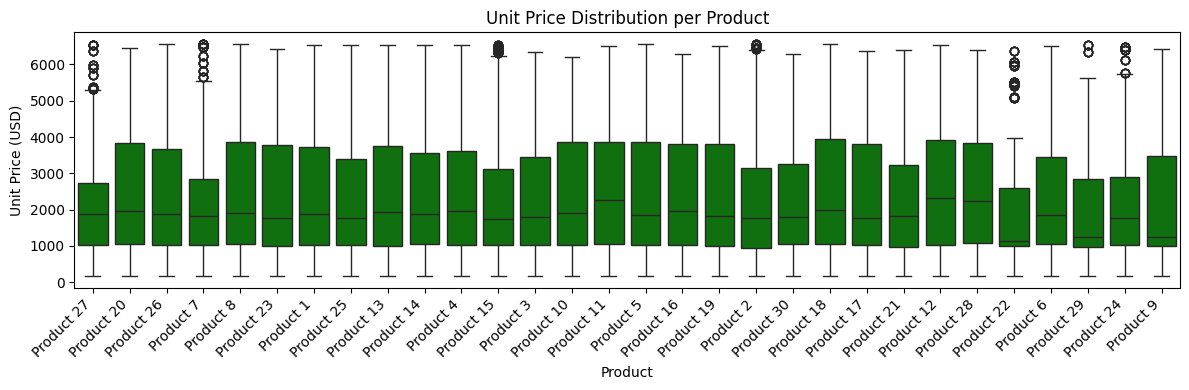

In [61]:
# Set figure size for clarity
plt.figure(figsize=(12,4))

# Create a boxplot of unit_price by product_name
sns.boxplot(
    data=df,
    x='product_name',   # X-axis: product categories
    y='unit_price',      # Y-axis: unit price values
    color='g'            # Box color
)

# Add title and axis labels
plt.title('Unit Price Distribution per Product')  # Chart title
plt.xlabel('Product')                              # X-axis label
plt.ylabel('Unit Price (USD)')                     # Y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

Top 10 States by Revenue and Order Count

 identify highest revenue generating state and compare their order volume


/tmp/ipython-input-1452768722.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1452768722.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


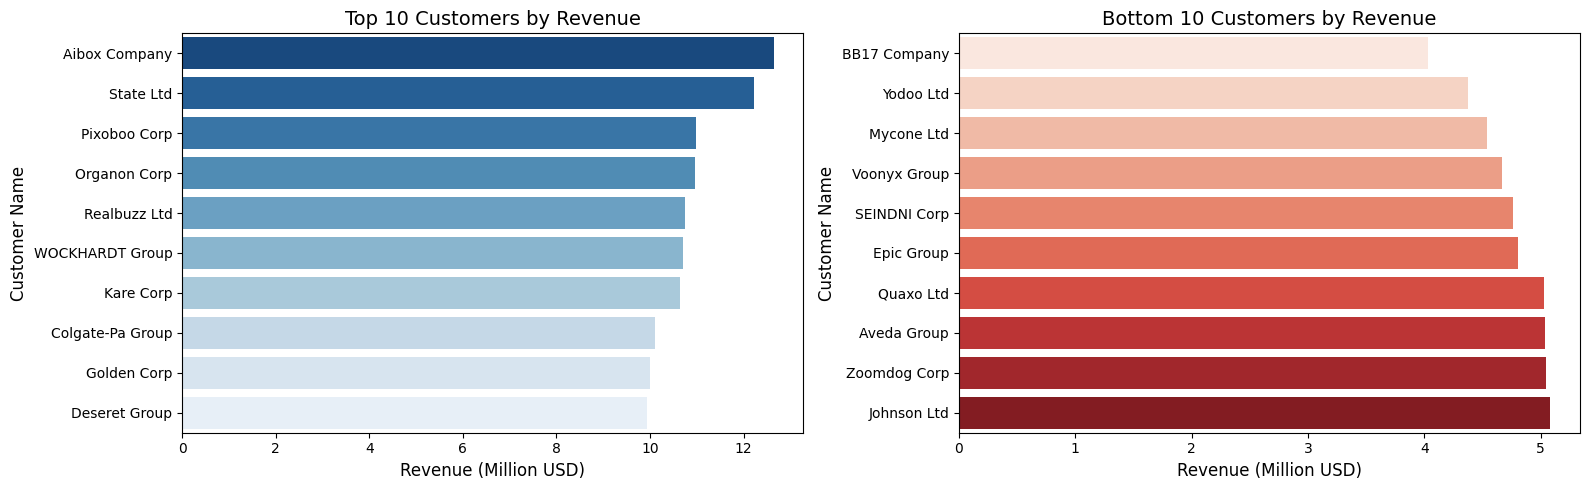

In [62]:
# 🔝 Calculate total revenue per customer and select top 10
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)

# 🔻 Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=True)  # Sort from lowest to highest
      .head(10)                     # Keep bottom 10 customers
)

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Blues_r',         # Color palette (reversed blues)
    ax=axes[0]                 # Draw on the left subplot
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)         # Title
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[0].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, # X-axis: revenue in millions
    y=bottom_rev.index,        # Y-axis: customer names
    palette='Reds',            # Color palette (reds)
    ax=axes[1]                 # Draw on the right subplot
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)      # Title
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[1].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

Compare average profit margins across sales channels to identify the most least profitable routes

/tmp/ipython-input-15237516.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


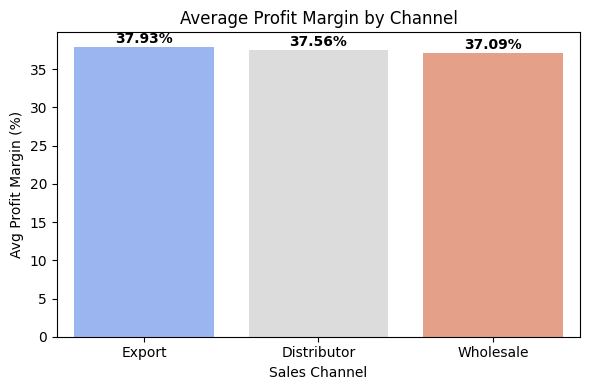

In [63]:
# 1️⃣ Compute average profit margin percentage for each channel
channel_margin = (
    df.groupby('channel')['profit_margin_pct']  # Group by sales channel
      .mean()                                  # Calculate mean profit margin %
      .sort_values(ascending=False)            # Sort channels from highest to lowest margin
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(6, 4))

# 3️⃣ Plot a bar chart of average profit margin by channel
ax = sns.barplot(
    x=channel_margin.index,    # X-axis: channel names
    y=channel_margin.values,   # Y-axis: average profit margin values
    palette='coolwarm'         # Color palette for bars
)

# 4️⃣ Add chart title and axis labels
plt.title('Average Profit Margin by Channel')  # Main title
plt.xlabel('Sales Channel')                    # X-axis label
plt.ylabel('Avg Profit Margin (%)')             # Y-axis label

# 5️⃣ Annotate each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
    ax.text(
        i,                  # X position (bar index)
        v + 0.5,            # Y position (bar height + small offset)
        f"{v:.2f}%",        # Text label showing percentage with two decimals
        ha='center',        # Center-align the text horizontally
        fontweight='bold'   # Bold font for readability
    )

# 6️⃣ Adjust layout to prevent clipping and display the plot
plt.tight_layout()
plt.show()

Identify highest and lowest revenue customers to tailor engagement strategies

/tmp/ipython-input-2018115719.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


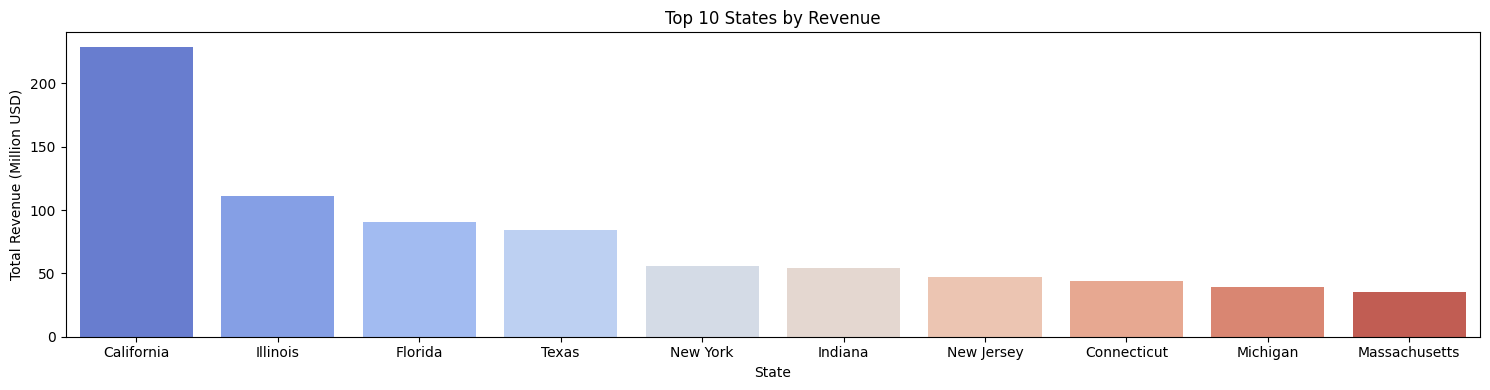

/tmp/ipython-input-2018115719.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


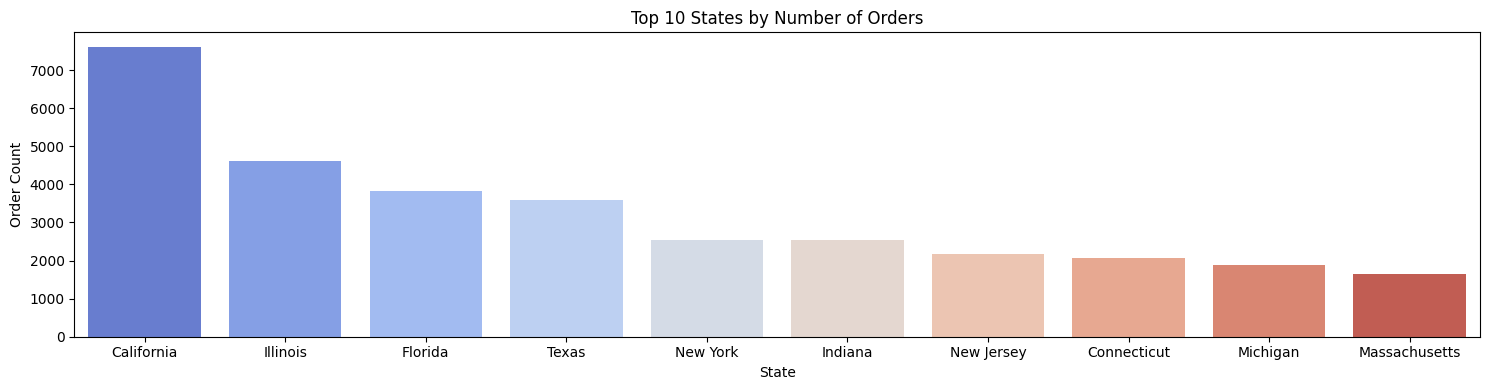

In [64]:
# Aggregate total revenue and unique order count per state
state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),          # Sum up revenue per state
    orders=('order_number', 'nunique')   # Count unique orders per state
).sort_values('revenue', ascending=False).head(10)  # Keep top 10 by revenue

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['revenue'] / 1e6,        # Y-axis: revenue in millions
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Revenue')     # Chart title
plt.xlabel('State')                       # X-axis label
plt.ylabel('Total Revenue (Million USD)') # Y-axis label
plt.tight_layout()                        # Adjust layout
plt.show()                                # Display the plot

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['orders'],               # Y-axis: order counts
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Number of Orders')  # Chart title
plt.xlabel('State')                              # X-axis label
plt.ylabel('Order Count')                        # Y-axis label
plt.tight_layout()                               # Adjust layout
plt.show()                                       # Display the plot

Segment customer by total revenue and average profit margin highlighting order volume ((Bubble chart)scatter plot variable point size)

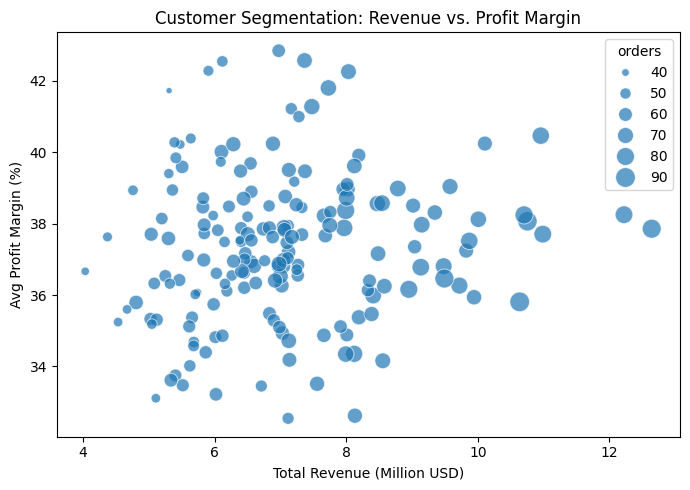

In [65]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()


Correlation Heatmap of Numeric feature

identify relationships among key numeric variables to uncover potential multicollinearity

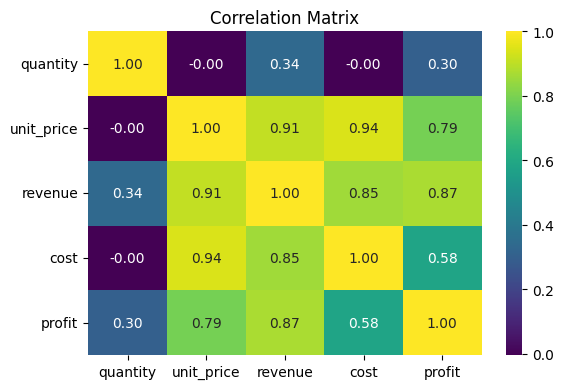

In [66]:
# List numeric columns to include in the correlation calculation
num_cols = ['quantity', 'unit_price', 'revenue', 'cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

In [67]:
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,...,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num,order_month,year_month
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1,2014-01,2014-01
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1,2014-01,2014-01
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1,2014-01,2014-01
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1,2014-01,2014-01
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1,2014-01,2014-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,...,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2,2018-02,2018-02
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,...,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2,2018-02,2018-02
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,...,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2,2018-02,2018-02
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,...,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2,2018-02,2018-02


In [68]:
# Export Final DataFrame to CSV
df.to_csv('Sales_data(EDA Exported).csv', index=False)

# **Conclusion**
The Regional Sales Analysis project successfully demonstrated how data analytics can convert raw, unstructured sales data into meaningful insights. Through systematic data cleaning, integration, and Exploratory Data Analysis (EDA), the project revealed seasonal sales peaks, regional variations, and the significant impact of certain products and customers on overall revenue. The findings highlight opportunities for optimizing sales strategies, improving profit margins, and strengthening customer relationships. Overall, the project reinforces the value of data-driven decision-making in enhancing business growth and competitiveness.